### Training a neural network

Training in supervised learning is about finding a parameter set (weights and biases) for the neural network such that at best all labels of a labeled dataset are reproduced.

Having the network set up and provided a dataset to use for *supervised learning*, we are now in the position to train our network.

The training method is controlled by the option key `optimizer`. By default it's set to *GradientDescent*.

Moreover, the following options control the training:

- `batch_size` : if smaller than the dataset dimension, then we get Stochastic Gradient Descent (SGD)
- `learning_rate` : learning rate to use for training, i.e. scaling the gradient per step
- `loss` : type of training function to use
- `max_steps` : fixed amount of training steps to execute
- `seed` : influencing the random starting parameter choice

In [1]:
import TATi.simulation as tati

#### Available loss functions

Loss functions available in tensorflow are also available in `tati`. We can get a list as follows.

In [2]:
print(tati.get_losses())

['mean_squared', 'log_loss', 'hinge_loss', 'cosine_distance', 'absolute_difference', 'sigmoid_cross_entropy', 'softmax_cross_entropy']


#### Performing the fit

Let us use simple *mean_squared* for the moment to train a network on the provided dataset.

We will be using a `learning_rate` of 0.1 which is a generally starting point. We'll be training for `max_steps` of 100 using a `seed` value of 426. Moreover, we write the trajectory to a CSV file called *training.csv*.

> Even if you do everything in a single python script, it is advisable to store intermediate results to file.

In [3]:
nn = tati(batch_data_files=["dataset-twoclusters.csv"],
          output_activation="linear",
          learning_rate=0.1,
          loss="mean_squared",
          max_steps=100,
          optimizer="GradientDescent",
          seed=426,
          trajectory_file="training.csv")
training_data = nn.fit()
print(nn.loss())

id                   float64
step                 float64
epoch                float64
accuracy              object
loss                  object
time_per_nth_step     object
scaled_gradient       object
virial                object
dtype: object
id                     int64
step                   int64
epoch                  int64
accuracy             float64
loss                 float64
time_per_nth_step    float64
scaled_gradient      float64
virial               float64
dtype: object
id         float64
step       float64
loss        object
weight0     object
weight1     object
bias0       object
dtype: object
id           int64
step         int64
loss       float64
weight0    float64
weight1    float64
bias0      float64
dtype: object
id                 float64
step               float64
epoch              float64
loss                object
average_virials     object
dtype: object
id                   int64
step                 int64
epoch                int64
loss               flo

The `fit()` function returned an object `training_data`, we'll come to that in a moment.

Let us first take a look at the minimum's parameters: two weights, one bias.

In [4]:
print(nn.parameters)

[0.14637233, 0.32722256, -0.045677684]


The `training_data` object contains three dataframes: `run_info`, `trajectory`, and `averages`.

- *run_info* contains information per step such as loss, accuracy, time spent, norm of gradient, ...
- *trajectory* contains the parameter in each step
- *averages* contains running averages for kinetic energy, for virials, for the ensemble loss, ...

#### Run information

First, we inspect how the training actually proceeded by looking at the loss value per step.

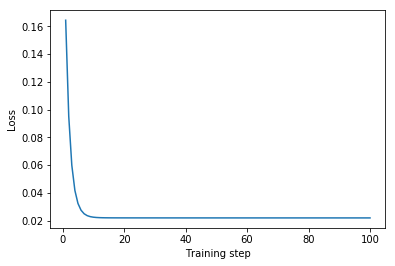

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

run = training_data.run_info[['step','loss']].values

plt.plot(run[:,0], run[:,1])
plt.xlabel("Training step")
plt.ylabel("Loss")
plt.show()

The loss has decreased well and is close to 0.

We can also look at other values. For pandas `DataFrame`'s, `columns` contains the name of each column.

In [6]:
print(training_data.run_info.columns)

Index(['id', 'step', 'epoch', 'accuracy', 'loss', 'time_per_nth_step',
       'scaled_gradient', 'virial'],
      dtype='object')


> Different optimizer and sampler methods produce different columns in *run_info* depending on their respective properties.

Let us inspect the norm of the gradient, the *scaled_gradient*. It is scaled by the `learning_rate`.

Generally, all columns in run info are scaled such that they are comparable among another, based on their effect on the parameters during the update step.

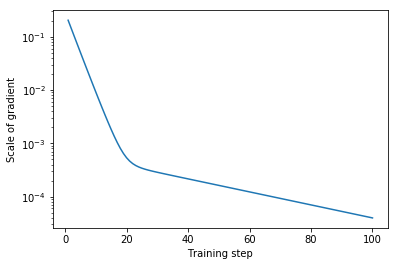

In [7]:
run = training_data.run_info[['step','scaled_gradient']].values

plt.semilogy(run[:,0], run[:,1])
plt.xlabel("Training step")
plt.ylabel("Scale of gradient")
plt.show()

### Trajectory

Let us also look at the training trajectory.

Index(['id', 'step', 'loss', 'weight0', 'weight1', 'bias0'], dtype='object')


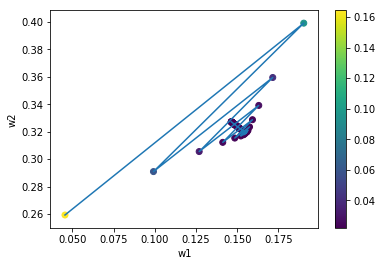

In [8]:
print(training_data.trajectory.columns)
trajectory = training_data.trajectory[['weight0','weight1','loss']].values

plt.plot(trajectory[:,0], trajectory[:,1])
plt.scatter(trajectory[:,0], trajectory[:,1], c=trajectory[:,2])
plt.xlabel("w1")
plt.ylabel("w2")
plt.colorbar()
plt.show()

#### Predict labels of unknown data

Having trained a network, we would like to make predictions for new data that the network has not seen, yet.

To this end, we use the `predict()` function which needs to be supplied with the unknown features.

In [9]:
unknown_data = np.array([[0,0], [1,1], [-1,1], [1,-1], [-1,-1]])
print(np.sign(nn.predict(unknown_data)))

[[[-1.]
  [ 1.]
  [ 1.]
  [-1.]
  [-1.]]]


We get a list of labels, one per item, in return. We have used `numpy.sign` to turn this into a list with entries in {-1,1}.

Let's use this to see the input space through the neural network classification lens.

In [10]:
import numpy as np
x = np.linspace(-3, 3, 10)
y = np.linspace(-3, 3, 10)
xv, yv = np.meshgrid(x, y)
coords = np.array([xv.reshape(-1), yv.reshape(-1)]).T
labels = nn.predict(coords) # not using np.sign to see distance to decision boundary

Plot it.

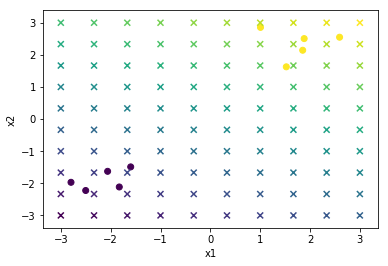

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# plot the labeled dataset for comparison
dataset = nn.dataset
plt.scatter(dataset[0][:,0], dataset[0][:,1], c=dataset[1][:,0])

# plot the input space predictions
plt.scatter(coords[:,0], coords[:,1], c=labels[0][:,0], marker='x')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


### Summary

- how to train a network
- how to visualize the run information and trajectory
- how to predict using a pre-trained network on unknown data